In [6]:
import os
import pandas as pd
import xarray as xr
import numpy as np
import time
def load_dataset(data_dir, from_year, to_year):
    """from_year: included, to_year: excluded"""
    ds = []
    for y in range(from_year,to_year):
        data_name = os.path.join(data_dir, f'weather_round1_train_{y}')
        # print(f'loading {data_name}')
        x = xr.open_zarr(data_name, consolidated=True)
        # print(x.time.values[0:9])
        print(f'{data_name}, {x.time.values[0]} ~ {x.time.values[-1]}')
        ds.append(x)
    ds = xr.concat(ds, 'time')
    ds = chunk_time(ds)
    return ds

def chunk_time(ds):
    dims = {k:v for k, v in ds.dims.items()}
    dims['time'] = 1
    print(f'chunking dims: {dims}')
    ds = ds.chunk(dims)
    return ds

In [7]:
ds = []
data_dir ='../../dataset/'
for i in range(2007, 2012):
    ds.append(load_dataset(data_dir, i, i+1))


../../dataset/weather_round1_train_2007, 2007-01-01T00:00:00.000000000 ~ 2007-12-31T18:00:00.000000000
chunking dims: {'channel': 70, 'lat': 161, 'lon': 161, 'time': 1}
../../dataset/weather_round1_train_2008, 2008-01-01T00:00:00.000000000 ~ 2008-12-31T18:00:00.000000000
chunking dims: {'channel': 70, 'lat': 161, 'lon': 161, 'time': 1}
../../dataset/weather_round1_train_2009, 2009-01-01T00:00:00.000000000 ~ 2009-12-31T18:00:00.000000000
chunking dims: {'channel': 70, 'lat': 161, 'lon': 161, 'time': 1}
../../dataset/weather_round1_train_2010, 2010-01-01T00:00:00.000000000 ~ 2010-12-31T18:00:00.000000000
chunking dims: {'channel': 70, 'lat': 161, 'lon': 161, 'time': 1}
../../dataset/weather_round1_train_2011, 2011-01-01T00:00:00.000000000 ~ 2011-12-31T18:00:00.000000000
chunking dims: {'channel': 70, 'lat': 161, 'lon': 161, 'time': 1}


In [19]:
processes = []
for data in ds:
    print(data)
    processes.append(data.mean(dim = ['lat', 'lon']).x.values)
    

<xarray.Dataset>
Dimensions:  (channel: 70, lat: 161, lon: 161, time: 1460)
Coordinates:
  * channel  (channel) <U5 'z50' 'z100' 'z150' 'z200' ... 'u10' 'v10' 'msl' 'tp'
  * lat      (lat) float32 50.0 49.75 49.5 49.25 49.0 ... 10.75 10.5 10.25 10.0
  * lon      (lon) float32 100.0 100.2 100.5 100.8 ... 139.2 139.5 139.8 140.0
  * time     (time) datetime64[ns] 2007-01-01 ... 2007-12-31T18:00:00
Data variables:
    x        (time, channel, lat, lon) float32 dask.array<chunksize=(1, 70, 161, 161), meta=np.ndarray>
<xarray.Dataset>
Dimensions:  (channel: 70, lat: 161, lon: 161, time: 1464)
Coordinates:
  * channel  (channel) <U5 'z50' 'z100' 'z150' 'z200' ... 'u10' 'v10' 'msl' 'tp'
  * lat      (lat) float32 50.0 49.75 49.5 49.25 49.0 ... 10.75 10.5 10.25 10.0
  * lon      (lon) float32 100.0 100.2 100.5 100.8 ... 139.2 139.5 139.8 140.0
  * time     (time) datetime64[ns] 2008-01-01 ... 2008-12-31T18:00:00
Data variables:
    x        (time, channel, lat, lon) float32 dask.array<chunksiz

In [27]:
final_data = np.concatenate(processes, axis=0)
target_labels = np.concatenate([np.full((processes[i].shape[0],), i) for i in range(len(processes))])


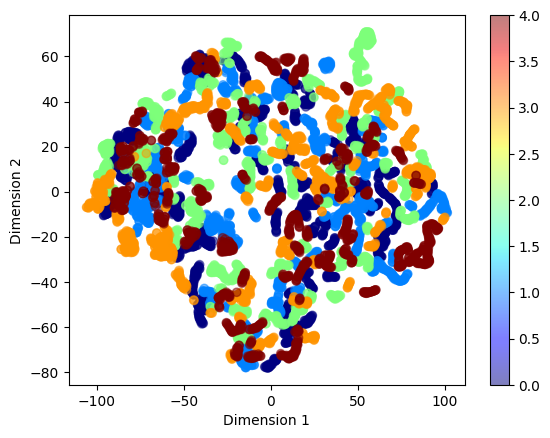

In [28]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(final_data)

# Create a scatter plot
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=target_labels, cmap='jet', alpha=0.5)

# Add colorbar and labels
plt.colorbar()
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Show plot
plt.savefig('a.png')